# Time Series Analysis


## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

In [ ]:
# all imports and env variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
import pandas_datareader.data as web

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

#from influxdb import InfluxDBClient
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import linregress

# This line of code should work on Windows and Mac
#%env QUANDL_API_KEY = "YOUR_API_KEY"

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
##import quandl
##quandl.ApiConfig.api_key = "YOUR_API_KEY"

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Option 2 - Using Yahoo Finance `yfinance` library

In [ ]:
!pip3 install yfinance

     |████████████████████████████████| 6.3 MB 6.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

start = datetime.datetime(2016, 11, 20)
end = datetime.datetime(2021, 11, 20)

##amzn = web.DataReader('WIKI/AMZN', 'quandl', start, end)

In [ ]:
import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)


[*********************100%***********************]  1 of 1 completed


In [ ]:
# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)

[*********************100%***********************]  1 of 1 completed


In [ ]:
amzn

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-21,766.000000,780.349976,765.109985,780.000000,780.000000,4614600
2016-11-22,788.169983,792.400024,781.000000,785.330017,785.330017,5311300
2016-11-23,781.729980,781.750000,773.119995,780.119995,780.119995,3540300
2016-11-25,786.500000,786.750000,777.900024,780.369995,780.369995,1837100
2016-11-28,776.989990,777.000000,764.239990,766.770020,766.770020,4438800
...,...,...,...,...,...,...
2021-11-22,3676.379883,3713.459961,3567.500000,3572.570068,3572.570068,4842200
2021-11-23,3585.040039,3621.050049,3527.709961,3580.040039,3580.040039,3690200
2021-11-24,3562.669922,3613.639893,3536.850098,3580.409912,3580.409912,2328000


In [ ]:
# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB','MMM', 'IBM']
all_stocks = yf.download(all_stocks_list, start = start)

[*********************100%***********************]  4 of 4 completed


In [ ]:
#all_stocks

In [ ]:
FB = yf.download('FB', start=start)
MMM = yf.download('MMM', start=start)
IBM = yf.download('IBM', start=start)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
FB

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-21,118.199997,121.949997,117.800003,121.769997,121.769997,35415400
2016-11-22,122.400002,122.980003,120.900002,121.470001,121.470001,26089200
2016-11-23,121.230003,121.309998,119.940002,120.839996,120.839996,15672100
2016-11-25,121.010002,121.139999,120.070000,120.379997,120.379997,8658600
2016-11-28,120.120003,121.690002,119.820000,120.410004,120.410004,18101300
...,...,...,...,...,...,...
2021-11-22,349.049988,353.829987,340.510010,341.010010,341.010010,27116800
2021-11-23,338.929993,341.399994,333.500000,337.250000,337.250000,17225000
2021-11-24,336.000000,341.779999,332.809998,341.059998,341.059998,13566200


In [ ]:
MMM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-21,171.419998,171.979996,170.720001,171.520004,147.578323,1993900
2016-11-22,171.669998,172.080002,171.279999,171.910004,147.913879,1553300
2016-11-23,172.080002,172.750000,171.759995,172.250000,148.206390,1477900
2016-11-25,172.210007,173.990005,172.210007,173.490005,149.273331,945800
2016-11-28,173.559998,173.770004,172.279999,172.500000,148.421524,1677700
...,...,...,...,...,...,...
2021-11-22,179.250000,182.279999,178.779999,179.660004,179.660004,2371900
2021-11-23,180.610001,181.320007,178.649994,179.460007,179.460007,1944200
2021-11-24,178.970001,179.500000,177.539993,177.630005,177.630005,1488500


In [ ]:
IBM

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-21,153.623322,155.831741,153.317398,155.611862,123.720055,4850407
2016-11-22,155.831741,155.831741,154.827911,155.516251,123.644051,2898257
2016-11-23,154.818359,155.238998,154.263855,154.856598,123.119568,2356324
2016-11-25,154.713196,156.013382,154.713196,155.965576,124.001228,1679144
2016-11-28,156.022949,157.418732,155.544937,157.284897,125.050179,4654072
...,...,...,...,...,...,...
2021-11-22,116.000000,118.809998,115.190002,116.470001,116.470001,6416200
2021-11-23,116.790001,117.940002,116.040001,116.790001,116.790001,4912800
2021-11-24,116.160004,117.269997,116.080002,116.730003,116.730003,3220800


### Response 3: Resample the data to get prices for the end of the business month. Select the Adjusted Close for each stock.



In [ ]:
resampled_FB= FB.resample('BM').last() # The last day of business month
resampled_AMZN= amzn.resample('BM').last() # The last day of business month
resampled_MMM= MMM.resample('BM').last() # The last day of business month
resampled_IBM= IBM.resample('BM').last() # The last day of business month

resampled_FB

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-30,120.320000,121.790001,117.949997,118.419998,118.419998,30188900
2016-12-30,116.599998,116.830002,114.769997,115.050003,115.050003,18684100
2017-01-31,130.169998,130.660004,129.520004,130.320007,130.320007,19790500
2017-02-28,136.789993,136.809998,134.750000,135.539993,135.539993,16112100
2017-03-31,142.309998,142.630005,141.889999,142.050003,142.050003,11478300
...,...,...,...,...,...,...
2021-07-30,354.000000,360.730011,352.940002,356.299988,356.299988,15966700
2021-08-31,379.950012,382.760010,378.799988,379.380005,379.380005,12345400
2021-09-30,340.450012,342.799988,338.149994,339.390015,339.390015,16547100


In [ ]:
resampled_AMZN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-30,762.000000,768.090027,750.250000,750.570007,750.570007,4625900
2016-12-30,766.469971,767.400024,748.280029,749.869995,749.869995,4139400
2017-01-31,823.750000,826.989990,819.559998,823.479980,823.479980,3137200
2017-02-28,851.450012,854.090027,842.049988,845.039978,845.039978,2793700
2017-03-31,877.000000,890.349976,876.650024,886.539978,886.539978,3957600
...,...,...,...,...,...,...
2021-07-30,3347.949951,3368.139893,3306.979980,3327.590088,3327.590088,9957100
2021-08-31,3424.800049,3472.580078,3395.590088,3470.790039,3470.790039,4356400
2021-09-30,3316.000000,3327.850098,3273.989990,3285.040039,3285.040039,2842400


## Select the Adjusted Close for each stock.

In [ ]:
#adjusted_close_FB=resampled_FB['Adj Close']
#adjusted_close_FB

In [ ]:
# adujted_close with pandas
adjusted_close_FB=resampled_FB.loc[:,['Adj Close']]
adjusted_close_FB

,Adj Close
Date,
2016-11-30,118.419998
2016-12-30,115.050003
2017-01-31,130.320007
2017-02-28,135.539993
2017-03-31,142.050003
...,...
2021-07-30,356.299988
2021-08-31,379.380005
2021-09-30,339.390015


In [ ]:
adjusted_close_AMZN=resampled_AMZN.loc[:,['Adj Close']]
adjusted_close_AMZN

,Adj Close
Date,
2016-11-30,750.570007
2016-12-30,749.869995
2017-01-31,823.479980
2017-02-28,845.039978
2017-03-31,886.539978
...,...
2021-07-30,3327.590088
2021-08-31,3470.790039
2021-09-30,3285.040039


In [ ]:
adjusted_close_MMM=resampled_MMM.loc[:,['Adj Close']]
adjusted_close_MMM

,Adj Close
Date,
2016-11-30,147.767578
2016-12-30,153.644257
2017-01-31,150.417679
2017-02-28,161.382431
2017-03-31,165.695236
...,...
2021-07-30,194.854706
2021-08-31,193.167984
2021-09-30,174.003937


In [ ]:
adjusted_close_IBM=resampled_IBM.loc[:,['Adj Close']]
adjusted_close_IBM

,Adj Close
Date,
2016-11-30,123.301979
2016-12-30,126.167511
2017-01-31,132.651093
2017-02-28,137.760284
2017-03-31,133.408844
...,...
2021-07-30,131.472778
2021-08-31,132.401474
2021-09-30,131.071228


###Response 4:  Use the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stock


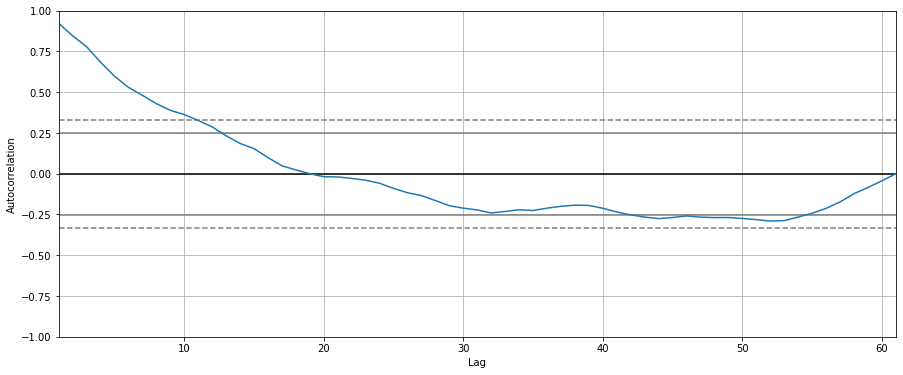

In [ ]:
autocorrelation_plot(adjusted_close_FB)

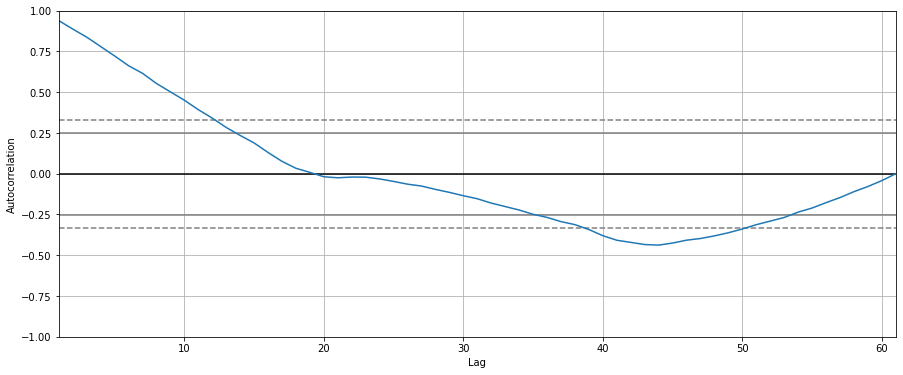

In [ ]:
autocorrelation_plot(adjusted_close_AMZN)

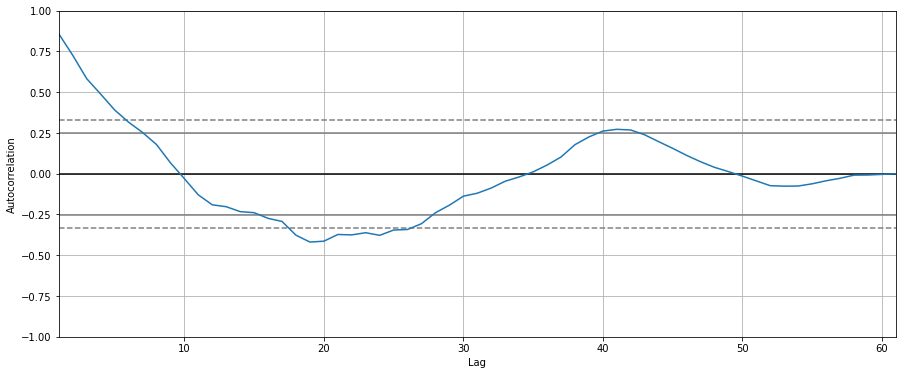

In [ ]:
autocorrelation_plot(adjusted_close_MMM)

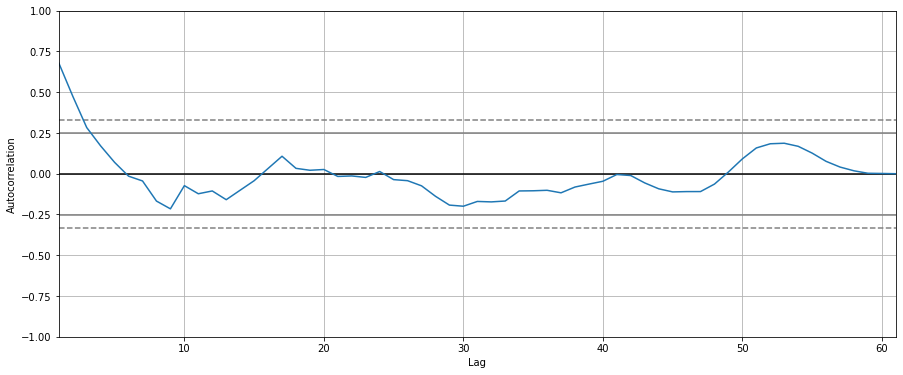

In [ ]:
autocorrelation_plot(adjusted_close_IBM)

**Explanation**

I can calculate the autocorrelation with Pandas autocorr() function which returns the value of the Pearson correlation coefficient. The Pearson correlation coefficient is a measure of the linear correlation between two variables. The Pearson correlation coefficient has a value between -1 and 1, where 0 is no linear correlation, >0 is a  positive and strong correlation, and <0  is a negative and strong correlation.

**Facebook**

In [ ]:

shift_1 = resampled_FB['Adj Close'].autocorr(lag=1)
print(shift_1)

0.9673941963309601


0.17849760131784975

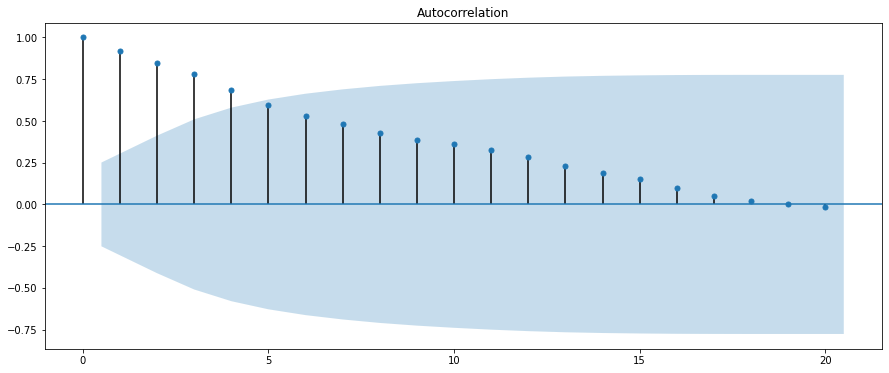

In [ ]:
plot_acf(resampled_FB['Adj Close'], lags=20)
plt.show()

From this plot, we see that values for the ACF are within 95 percent confidence interval (represented by the blue part) for lags > 0, which verifies that our data doesn’t have any autocorrelation

**Amzon**

In [ ]:
shift_2 = resampled_AMZN['Adj Close'].autocorr(lag=1)
print(shift_2)

0.9822023738726287


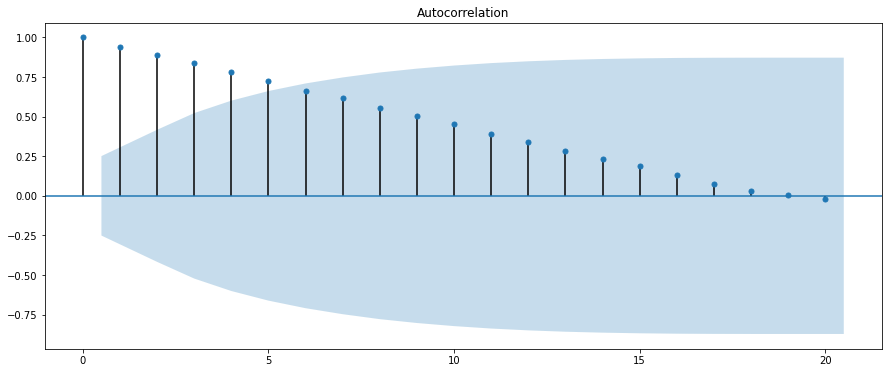

In [ ]:
plot_acf(resampled_AMZN['Adj Close'], lags=20)
plt.show()

**MMM**

In [ ]:
shift_3 = resampled_MMM['Adj Close'].autocorr(lag=1)
print(shift_3)

0.8691716239805367


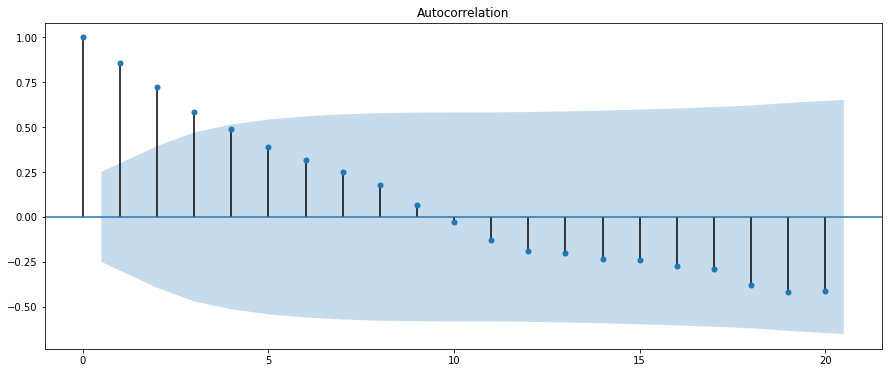

In [ ]:
plot_acf(resampled_MMM['Adj Close'], lags=20)
plt.show()

**IBM**

In [ ]:
shift_4 = resampled_IBM['Adj Close'].autocorr(lag=1)
print(shift_4)

0.680589193924011


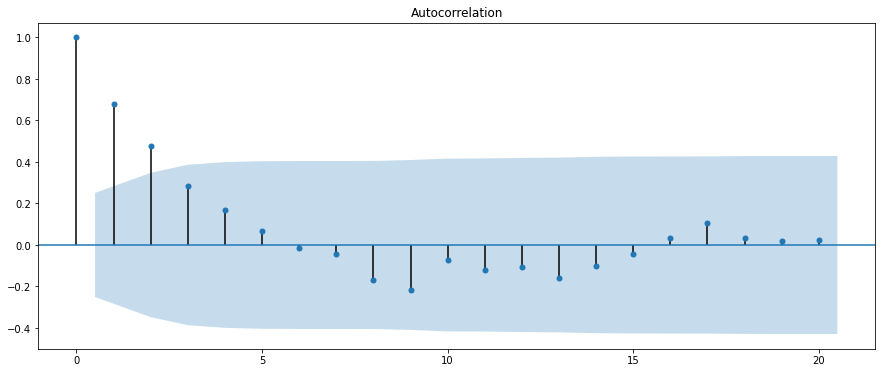

In [ ]:
plot_acf(resampled_IBM['Adj Close'], lags=20)
plt.show()

From looking at the plots above, it’s not obviously apparent whether or not our data will have any autocorrelation. For example, we can’t detect the presence of seasonality, which would yield high autocorrelation.

The dotted lines: as we can observe, the data lines are just above and below the first quartile, or within the 95% confidence interval. This will indicate the significance of the correlation. If the line is above or below the dotted line, not in between, we can say that the correlation is significant, and that the adjusted closed value is correlated to time

### Response 5:  The monthly returns for each stock

In [ ]:
FB_return = adjusted_close_FB/adjusted_close_FB.shift()
FB_return

,Adj Close
Date,
2016-11-30,NaN
2016-12-30,0.971542
2017-01-31,1.132725
2017-02-28,1.040055
2017-03-31,1.048030
...,...
2021-07-30,1.024704
2021-08-31,1.064777
2021-09-30,0.894591


In [ ]:
FB_return=FB_return.dropna()

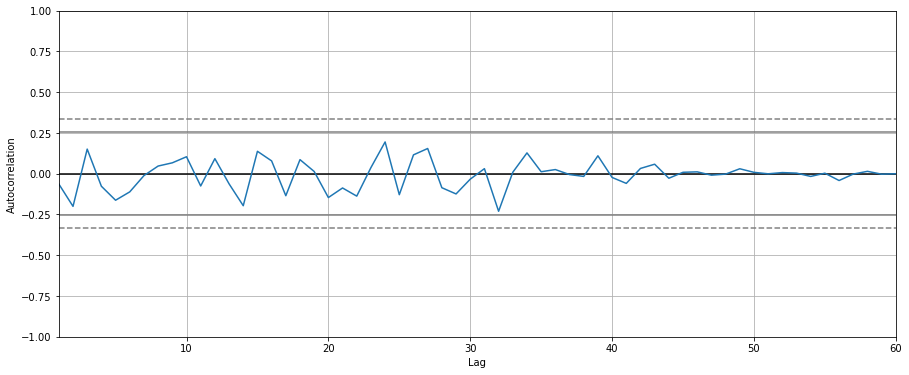

In [ ]:
autocorrelation_plot(FB_return)

In [ ]:
# !!!!!!
#rng=pd.date_range('2016-11-20','2021-11-20', freq='B')
#all_stocks_test=pd.DataFrame(all_stocks, index=rng)#all_stocks_list
#all_stocks_test

#fig, ax=plt.subplots()
#ax=plt.plot(all_stocks_test['FB']);
#fig.autofmt_xdate()

In [ ]:
AMZN_return = adjusted_close_AMZN/adjusted_close_AMZN.shift()
AMZN_return

,Adj Close
Date,
2016-11-30,NaN
2016-12-30,0.999067
2017-01-31,1.098164
2017-02-28,1.026182
2017-03-31,1.049110
...,...
2021-07-30,0.967278
2021-08-31,1.043034
2021-09-30,0.946482


In [ ]:
AMZN_return=AMZN_return.dropna()

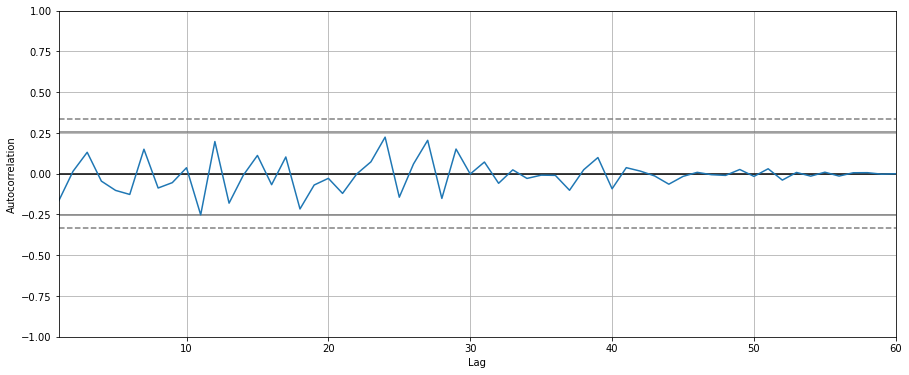

In [ ]:
autocorrelation_plot(AMZN_return)

**MMM stocks**

In [ ]:
MMM_return = adjusted_close_MMM/adjusted_close_MMM.shift()
MMM_return

,Adj Close
Date,
2016-11-30,NaN
2016-12-30,1.039770
2017-01-31,0.979000
2017-02-28,1.072895
2017-03-31,1.026724
...,...
2021-07-30,0.996526
2021-08-31,0.991344
2021-09-30,0.900791


In [ ]:
MMM_return=MMM_return.dropna()

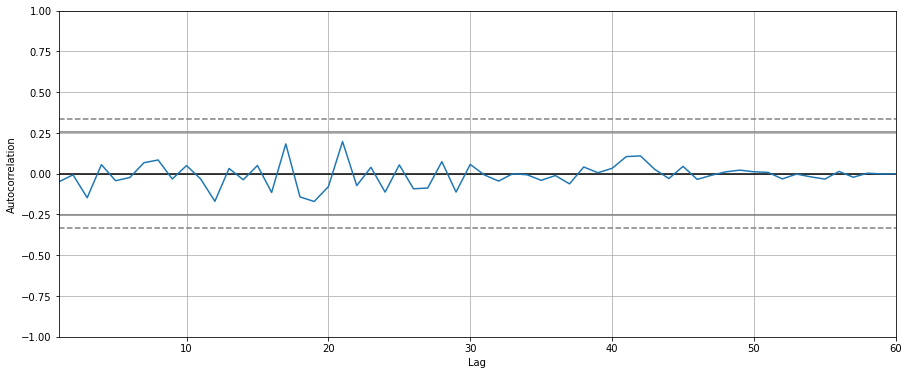

In [ ]:
autocorrelation_plot(MMM_return)

**IBM stoks**

In [ ]:
IBM_return = adjusted_close_IBM/adjusted_close_IBM.shift()
IBM_return

,Adj Close
Date,
2016-11-30,NaN
2016-12-30,1.023240
2017-01-31,1.051389
2017-02-28,1.038516
2017-03-31,0.968413
...,...
2021-07-30,0.961594
2021-08-31,1.007064
2021-09-30,0.989953


In [ ]:
IBM_return=IBM_return.dropna()

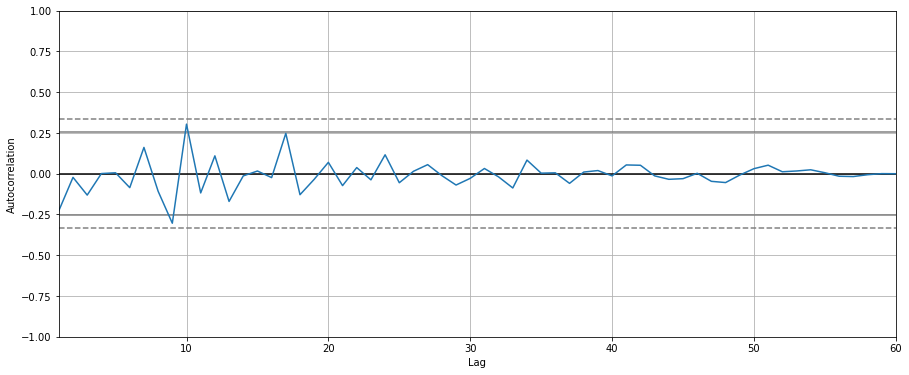

In [ ]:
autocorrelation_plot(IBM_return)

### Response 6: Combine all 4 time series (returns) into a single DataFrame

**Expanation:**
As we can see in the plots above, there is no significant trend seen in the month end returns, the values are randomly distributed, and therefore, we can concluded that the stock price returns are not affected by the time.

In [ ]:
Combined_series = pd.concat([FB_return, AMZN_return, MMM_return, IBM_return], join='outer', axis=1)

In [ ]:
Combined_series

,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,
2016-12-30,0.971542,0.999067,1.039770,1.023240
2017-01-31,1.132725,1.098164,0.979000,1.051389
2017-02-28,1.040055,1.026182,1.072895,1.038516
2017-03-31,1.048030,1.049110,1.026724,0.968413
2017-04-28,1.057726,1.043371,1.023519,0.920466
2017-05-31,1.008053,1.075276,1.050356,0.961514
2017-06-30,0.996831,0.973236,1.018193,1.007862
2017-07-31,1.121009,1.020434,0.966281,0.940454
2017-08-31,1.016071,0.992731,1.021500,0.999110


In [ ]:
Combined_series=Combined_series.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76ae295a10>,
      dtype=object)

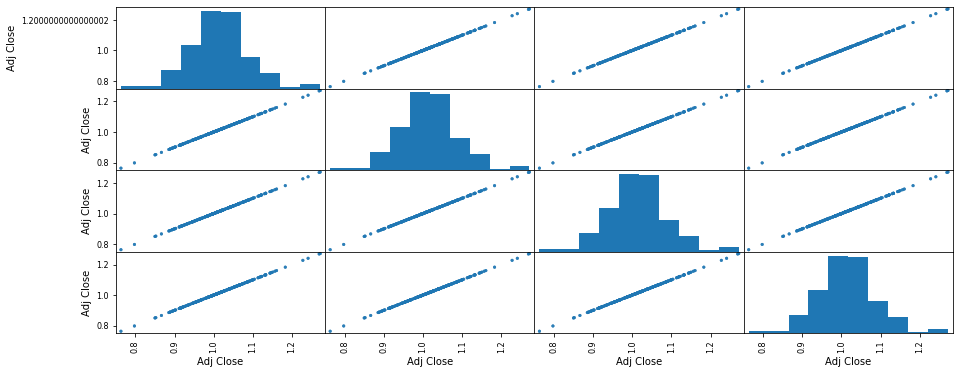

In [ ]:
pd.plotting.scatter_matrix(Combined_series)

**Conclutions**
Autocorrelations are a great tool to observe whether there is any significant change or trend that can be explained by internal association. In the case of Month End data, we can see that there is some significant trend we can observe, and that the values are not randomly distributed. Although, when looking at the returns, there is no such significant trend (all the values are in between 95% confidence interval)